# コンピュータがデータ処理する仕組み
1. コンピュータのメモリは内部メモリと外部メモリの2種類からなる
2. コンピュータは、内部メモリとCPUでプログラムとデータを処理する
3. 外部メモリは、内部メモリ内で処理した結果のデータを保存するために使われる
4. なので、内部メモリ内で処理したデータは、外部メモリに保存し、また外部メモリに保存したデータは内部メモリに再度読み込んで処理する
5. 外部メモリの容量 >> 内部メモリの容量　外部メモリのコスト << 内部メモリのコスト
6. 外部メモリに保存したデータはファイルもしくは外部ファイル（物理ファイル）と呼ぶ。
   


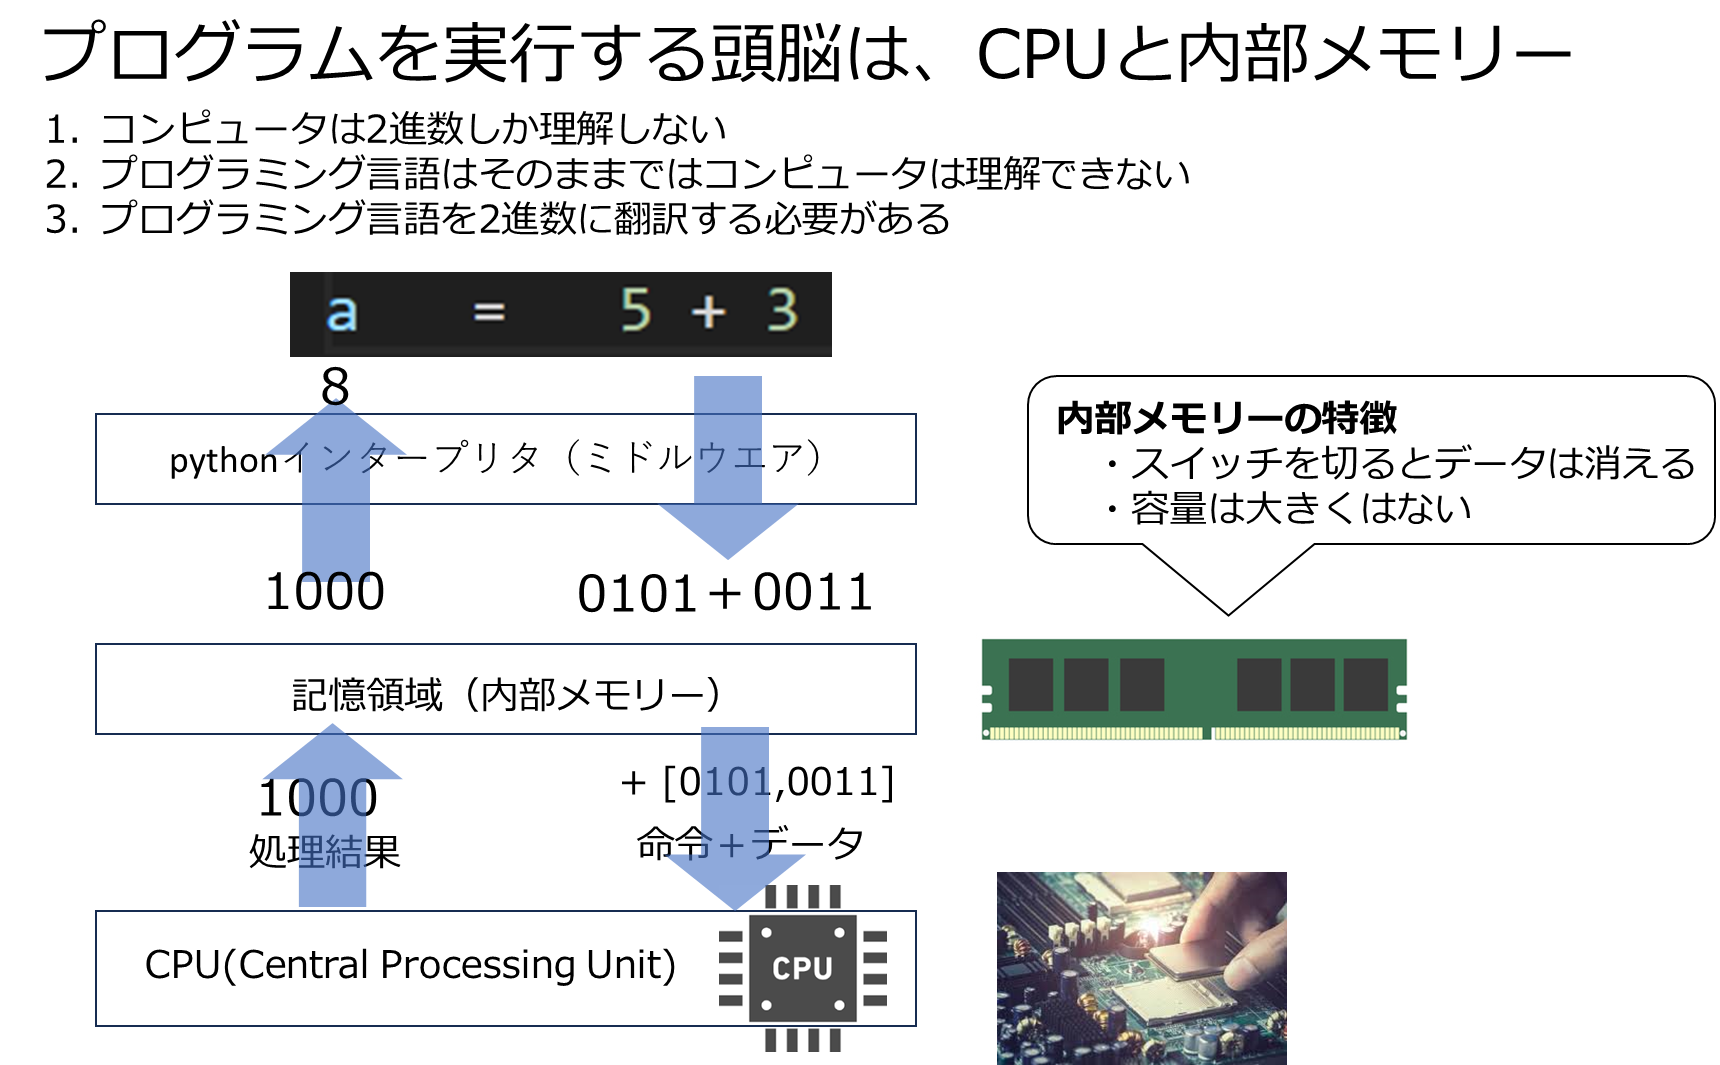

# ファイルとは
1. ファイルはデータを保存するためのデータ形式
2. ファイルには.csv, .txt（テキスト）など、何種類か異なるタイプがある
3. 物理ファイル名は、ファイル名.拡張子　からなる（拡張子はファイルの種類を表す）
   
### ● プログラムで処理したデータ（つまり内部メモリー上にあるデータ）をファイルに保存するときは、ファイルの'書き出し'を行う。
### ● ファイルに保存したデータをプログラムで処理する時には、ファイルの（内部メモリーへの）”読み込み"を行う。
### ● ファイルの読み書きもpythonプログラミングで行う



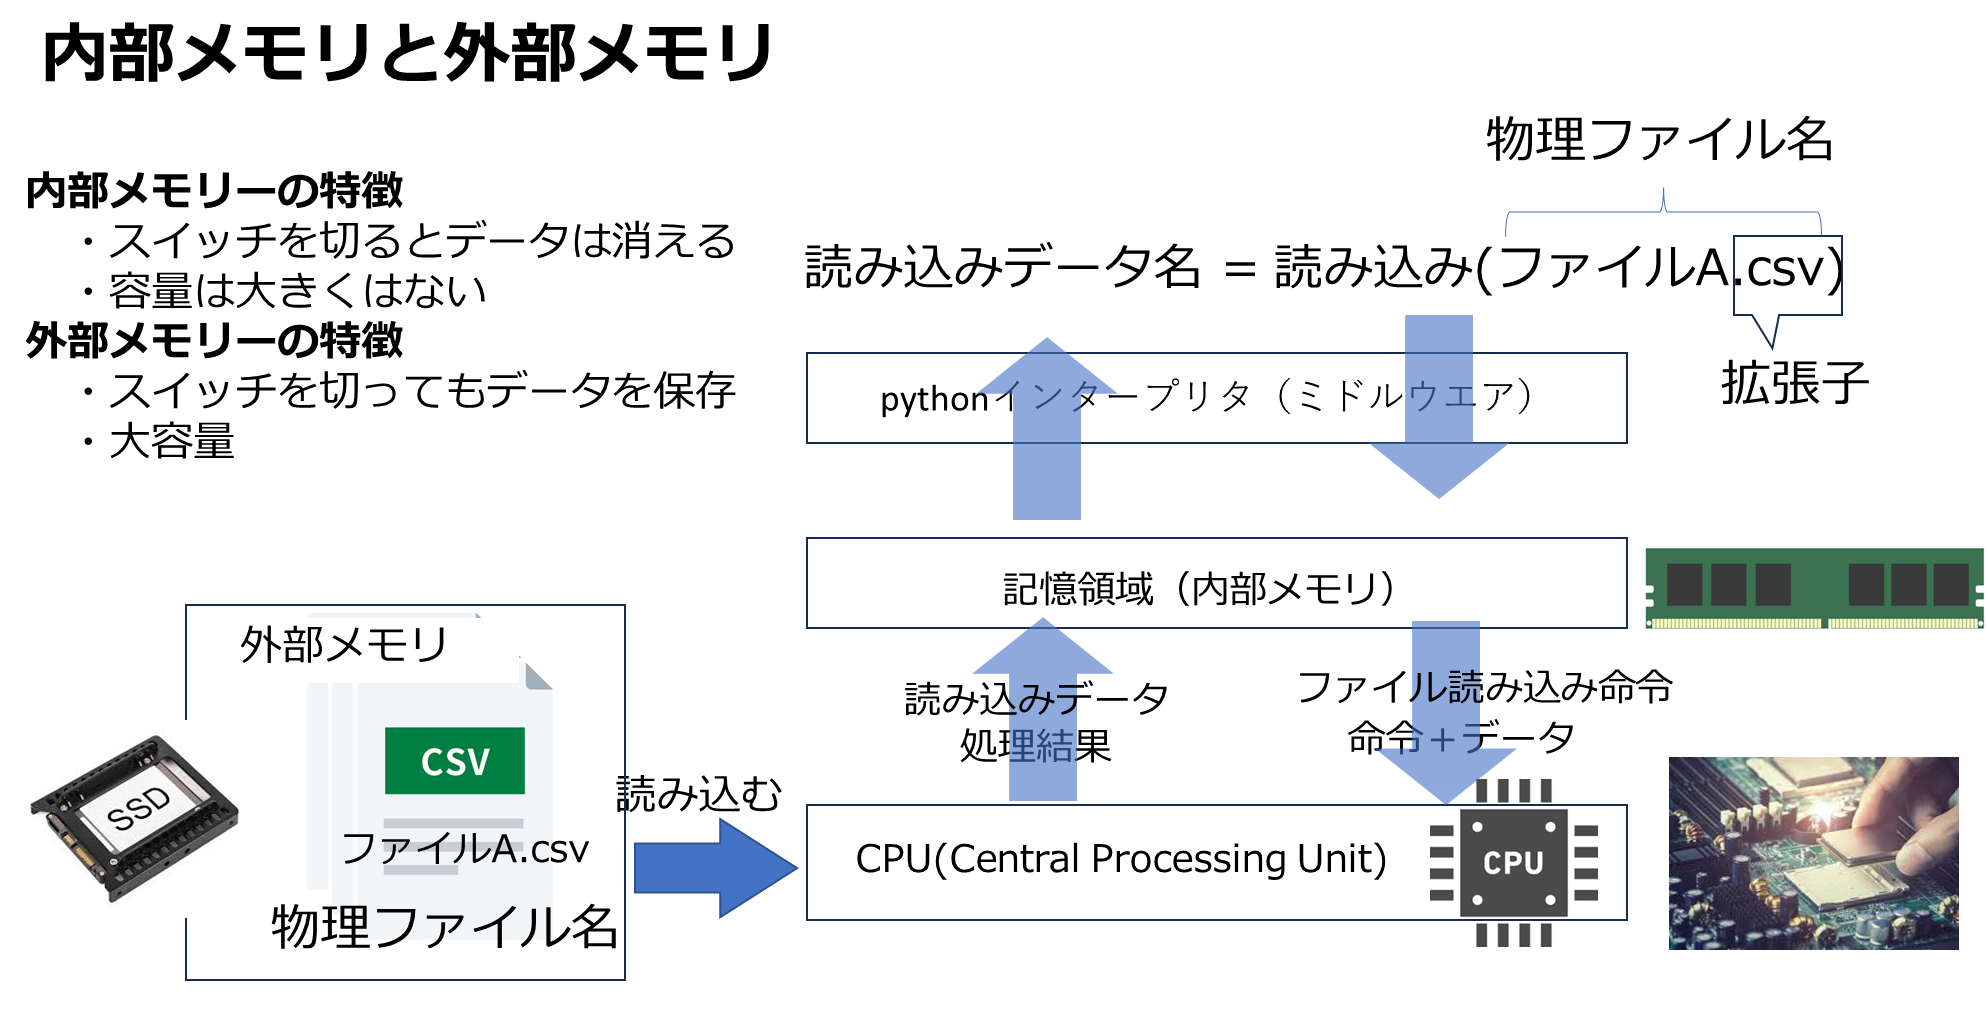

# 1. csvファイル

### 1) DataFrameからcsvファイルへの書き出し
1. csv形式とよばれる表形式のファイル
2. DataFrame型は、csvファイルに書き出すことができる

### 構文

---
```python
with codecs.open("物理ファイル名", "w", "ms932", "ignore") as 論理ファイル名:         
    DataFrame名.to_csv(論理ファイル名, index=False, encoding="ms932", mode='w', header=True)
```

- 物理ファイル名：csv形式の場合は、末尾に.csvをつける。
  
---

例：各国平均寿命推移のデータをcsvファイルに書き出す。
- 物理ファイル名は、lifespan.csvとする
- lifespanはdataframeなので、csvに書き出すことができる
- PCにエクセルをインストールしている場合は、このcsvを開いて確認。もしくはgoogle driveにコピーして確認することもできる

In [1]:
import codecs
import seaborn as sns
import pandas as pd
lifespan = sns.load_dataset("healthexp")
print(lifespan)

with codecs.open("lifespan.csv", "w", "ms932", "ignore") as f:         
     lifespan.to_csv(f, index=False, encoding="ms932", mode='w', header=True)

     Year        Country  Spending_USD  Life_Expectancy
0    1970        Germany       252.311             70.6
1    1970         France       192.143             72.2
2    1970  Great Britain       123.993             71.9
3    1970          Japan       150.437             72.0
4    1970            USA       326.961             70.9
..    ...            ...           ...              ...
269  2020        Germany      6938.983             81.1
270  2020         France      5468.418             82.3
271  2020  Great Britain      5018.700             80.4
272  2020          Japan      4665.641             84.7
273  2020            USA     11859.179             77.0

[274 rows x 4 columns]


### 2) csvファイルからDataFrameへの読み込み

### 構文
読み込むとdataframeになる

---
```python
import pandas as pd
論理ファイル名 = pd.read_csv('物理ファイル名.csv', encoding='ms932', sep=',',skiprows=0)
```
---

上記で書き出したcsvファイルを再度読み込むと、確かにもとのdataframeになって復元されている。

In [2]:
lspan_df = pd.read_csv('lifespan.csv', encoding='ms932', sep=',',skiprows=0)
lspan_df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


# 演習1. 
lspan_dfを年別平均データに集約して、csvに書き出し、再度読み込んでもとのdataframeであることを確認せよ

    Year  Spending_USD  Life_Expectancy
0   1970    209.169000        71.520000
1   1971    253.531200        71.920000
2   1972    306.617000        71.800000
3   1973    343.207000        72.033333
4   1974    396.625333        72.400000
5   1975    435.277500        72.850000
6   1976    519.252750        73.325000
7   1977    571.407000        73.700000
8   1978    643.639333        73.866667
9   1979    713.716500        74.500000
10  1980    719.369833        74.233333
11  1981    828.595800        74.620000
12  1982    896.707400        74.920000
13  1983    968.013200        75.120000
14  1984   1037.950000        75.420000
15  1985   1102.616000        75.616667
16  1986   1190.312800        75.860000
17  1987   1273.074800        76.180000
18  1988   1386.068200        76.260000
19  1989   1472.263600        76.480000
20  1990   1573.295167        76.916667
21  1991   1654.811600        77.060000
22  1992   1808.727000        77.100000
23  1993   1889.864333        77.083333


# 2. テキストファイル　.txt
1. test.txtを開くと、以下のような文書が表示されるはず。このようにテキストを保存するためのファイルをテキストファイルと呼ぶ
2. テキストファイルは、拡張子 .txtである

---

令和4年12月5日現在の状況
熊谷市居住の陽性者数（参考数値) 　166人
県発表件数の内訳ではありませんのでご注意ください。県が、HER-SYSに届出のあった数および電子申請で登録のあった数を集計した参考数値です。


累計（参考数値）　31,827人
令和4年9月28日からは参考数値を累計しているため、実態とは異なります。

---  

#### テキストファイル test.txtをpythonで内部メモリーに読み込む




In [4]:
f = open('test_text.txt',encoding="utf-8")
data1 = f.read()
f.close()
print(data1)

令和4年12月5日現在の状況
熊谷市居住の陽性者数（参考数値) 　166人
県発表件数の内訳ではありませんのでご注意ください。県が、HER-SYSに届出のあった数および電子申請で登録のあった数を集計した参考数値です。
　

累計（参考数値）　31,827人
令和4年9月28日からは参考数値を累計しているため、実態とは異なります。




# 3. 汎用的なファイル .pickle

**pickle(ピックル)は、pythonのあらゆるデータ型（の組み合わせ）を外部メモリーに保存するためのファイル形式**  
pickleは瓶詰め  
https://qiita.com/hatt0519/items/f1f4c059c28cb1575a93

### 構文

---
```python
# 書き出し
import pickle
with open('物理ファイル名.pickle', 'wb') as f:
    pickle.dump(データ名,f)

# 読み込み
with open('物理ファイル名.pickle', 'rb') as f:
   データr = pickle.load(f)
```
---
DataFrame型 lifespan を国別にグループ化すると、国別にDataFrameができあがる。



In [9]:
lifespan_g = lifespan.groupby('Country')
for c,lg in lifespan_g:
    print(c)
    print(lg)

Canada
     Year Country  Spending_USD  Life_Expectancy
5    1971  Canada       313.391             72.8
23   1976  Canada       543.337             73.8
33   1979  Canada       692.269             75.1
37   1980  Canada       791.812             75.2
43   1981  Canada       898.807             75.5
48   1982  Canada       996.086             75.6
53   1983  Canada      1066.746             75.9
58   1984  Canada      1135.020             76.2
63   1985  Canada      1212.850             76.3
69   1986  Canada      1278.816             76.5
74   1987  Canada      1357.453             76.7
79   1988  Canada      1461.300             76.8
84   1989  Canada      1579.543             77.1
89   1990  Canada      1699.774             77.3
95   1991  Canada      1805.209             77.6
100  1992  Canada      1897.456             77.8
106  1993  Canada      1930.889             77.8
112  1994  Canada      1962.196             77.9
118  1995  Canada      1984.944             78.0
124  1996  Ca

DataFrameをgroup化するとDataFrame型でなくなるので、csvに書き出せない

In [10]:
with codecs.open("lifespan_g.csv", "w", "ms932", "ignore") as f:         
     lifespan_g.to_csv(f, index=False, encoding="ms932", mode='w', header=True)


AttributeError: 'DataFrameGroupBy' object has no attribute 'to_csv'

pickleファイルには書き出すことができる

In [12]:
import pickle

with open('lifespan_g.pickle', 'wb') as f:
    pickle.dump(lifespan_g,f)

# 読み込み
with open('lifespan_g.pickle', 'rb') as f:
    lifespan_group = pickle.load(f)
    
for c,lg in lifespan_group:
    print(c)
    print(lg)


Canada
     Year Country  Spending_USD  Life_Expectancy
5    1971  Canada       313.391             72.8
23   1976  Canada       543.337             73.8
33   1979  Canada       692.269             75.1
37   1980  Canada       791.812             75.2
43   1981  Canada       898.807             75.5
48   1982  Canada       996.086             75.6
53   1983  Canada      1066.746             75.9
58   1984  Canada      1135.020             76.2
63   1985  Canada      1212.850             76.3
69   1986  Canada      1278.816             76.5
74   1987  Canada      1357.453             76.7
79   1988  Canada      1461.300             76.8
84   1989  Canada      1579.543             77.1
89   1990  Canada      1699.774             77.3
95   1991  Canada      1805.209             77.6
100  1992  Canada      1897.456             77.8
106  1993  Canada      1930.889             77.8
112  1994  Canada      1962.196             77.9
118  1995  Canada      1984.944             78.0
124  1996  Ca


pickleはどんなデータ型でも保存できる

In [13]:

with open('lifespan.pickle', 'wb') as f:
    pickle.dump(lifespan,f)

# 読み込み
with open('lifespan.pickle', 'rb') as f:
    l_span = pickle.load(f)
l_span

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


# 演習2.
上記2.のテキストファイルtest_text.txtを読み込んで、pickleファイルに保存し、再度読み込んで表示せよ

'令和4年12月5日現在の状況\n熊谷市居住の陽性者数（参考数値) \u3000166人\n県発表件数の内訳ではありませんのでご注意ください。県が、HER-SYSに届出のあった数および電子申請で登録のあった数を集計した参考数値です。\n\u3000\n\n累計（参考数値）\u300031,827人\n令和4年9月28日からは参考数値を累計しているため、実態とは異なります。\n\n'